In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
intlines = []
with open('arch/data/intron.txt', 'r') as fp:
    for line in fp.readlines():
        line = line.rstrip()
        intlines.append(line)

In [123]:
intsizes = []
for i in intlines:
    intsizes.append(len(i))

intbins = [0 for x in range(max(intsizes)+1)]
for i in range(len(intsizes)):
    intbins[intsizes[i]] += 1
    
m = 5
maxlen = 200

count = 0
smoodata = []
for i in range(len(intbins)):
    m2 = int((m/2) + 0.5 - 1)
    bef = intbins[i-m2:i]
    now = intbins[i]
    aft = intbins[i+1:i+m2+1]
    total = sum(bef) + now + sum(aft)
    smoopt = total/m
    count += 1
    if count <= maxlen:
        smoodata.append(smoopt)

In [124]:
logsmoo = []
for i in smoodata:
    if i > 0:
        logsmoo.append(math.log(i))

In [125]:
df = pd.DataFrame(smoodata)
df.insert(1, 'length', [x for x in range(len(smoodata))])
df2 = df.rename(columns={0: 'counts'})

In [127]:
df3 = pd.DataFrame(intbins[:maxlen])
df3.insert(1, 'length', [x for x in range(len(smoodata))])
df4 = df3.rename(columns={0: 'counts'})

<Axes: xlabel='length'>

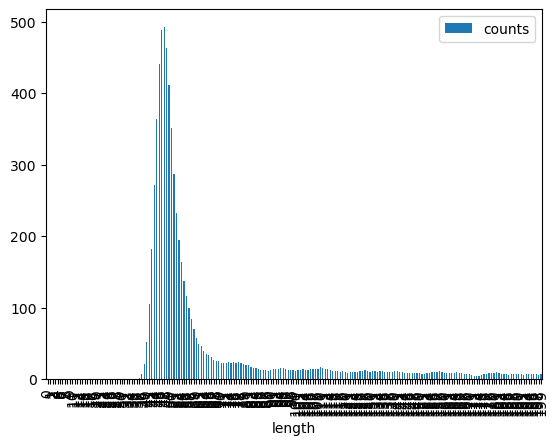

In [128]:
df2.plot.bar(x='length', y='counts')

<Axes: xlabel='length'>

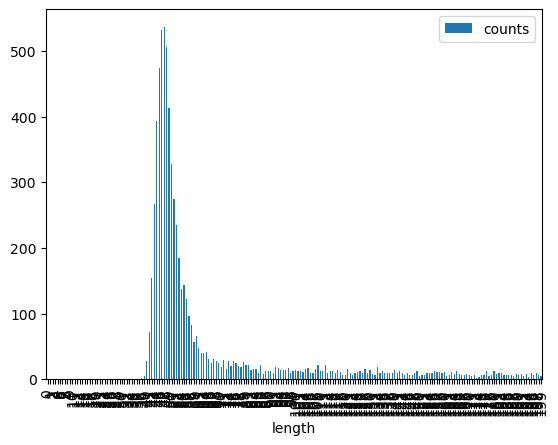

In [129]:
df4.plot.bar(x='length', y='counts')